Import Libraries and data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data1=pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [4]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


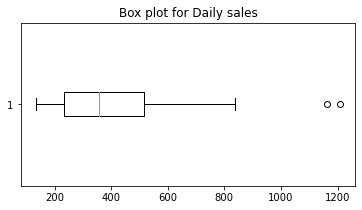

In [6]:
#Boxplot for daily column 
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily sales")
plt.boxplot(data1["daily"],vert=False)
plt.show()

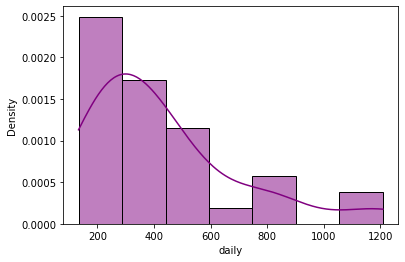

In [7]:
#Histogram for daily column
sns.histplot(data1["daily"],kde=True,stat="density",color='purple')
plt.show()

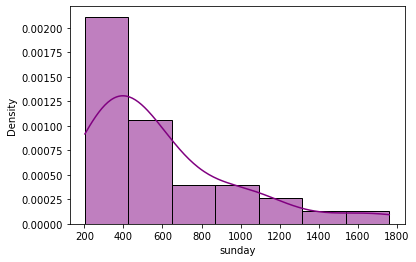

In [8]:
#Histogram for sunday column
sns.histplot(data1["sunday"],kde=True,stat="density",color='purple')
plt.show()

Observations
- There are no missing values
- The daily column values appears to right-skewed
- The sunday column values appear to be right skewed
- There are two outliers in both daily column and also in sunday column as observed from the boxplots

Scatter plot and Correlation Strength

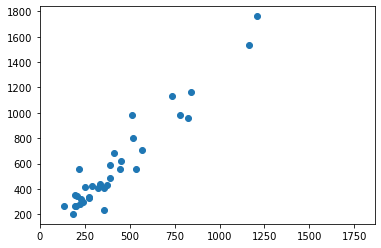

In [9]:
#Scatter plotting for daily and sunday columns
x= data1["daily"]
y=data1["sunday"]
plt.scatter(data1["daily"],data1["sunday"])
plt.xlim(0,max(x) +100)
plt.xlim(0,max(y) +100)
plt.show()

In [10]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [11]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Observations
- The relationship between x(daily) and y(sunday) is seen to be linear as seen from scatter plot
- The correlation is strong positive with pearson's correlation coefficient of 0.958154

Fit a Linear regression Model

In [12]:
model1 =smf.ols("sunday~daily",data =data1).fit()

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        11:37:59   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

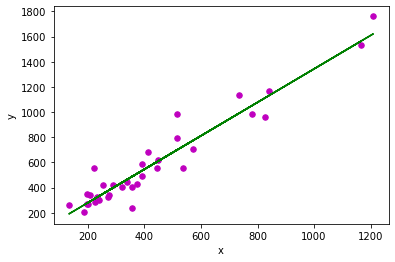

In [14]:
#plot the scatter plot and overlay the fitted sttaight line using matplotlib
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 13.84
b1 = 1.33
y_hat = b0 + b1*x
plt.plot(x, y_hat, color = "g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

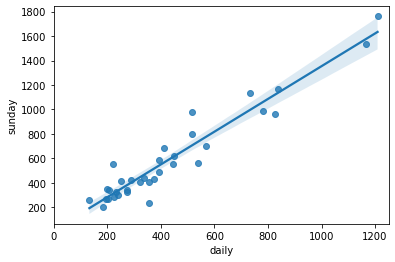

In [15]:
sns.regplot(x="daily", y="sunday", data=data1)
plt.xlim([0,1250])
plt.show()

In [16]:
#predict sunday sales for 200 and 300 and 400 and 500 daily circulation
newdata=pd.Series([200,300,500])
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred                                       

,daily
0,200
1,300
2,500


In [17]:
model1.predict(data_pred)

0    281.778581
1    415.750057
2    683.693009
dtype: float64

In [18]:
pred = model1.predict(data1["daily"])
pred                  

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [19]:
data1["Y_hat"] = pred
data1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [20]:
data1["residuals"]=data1["sunday"]-data1["Y_hat"]
data1

,Newspaper,daily,sunday,Y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [21]:
mse = np.mean((data1["daily"]-data1["Y_hat"])**2)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  33794.87469205262
RMSE:  183.83382358002734


In [22]:
mae = np.mean(np.abs(data1["daily"]-data1["Y_hat"]))
mae

160.2399411764706

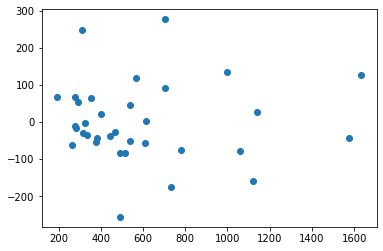

In [23]:
plt.scatter(data1["Y_hat"], data1["residuals"])

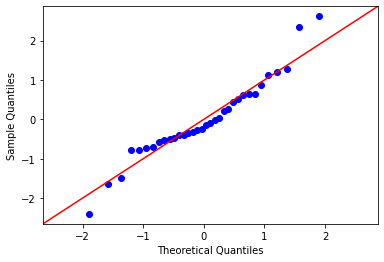

In [24]:
# Plot the Q-Q plot(to check the normality of residuals)
import statsmodels.api as sm
sm.qqplot(data1["residuals"], line='45', fit=True)
plt.show()

<AxesSubplot:xlabel='residuals', ylabel='Count'>

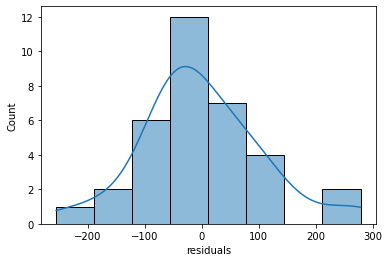

In [25]:
# Plot the kde distribution for residuals
sns.histplot(data1["residuals"], kde =True)

In [26]:
data2 = pd.read_csv("NewspaperData.csv")
data2

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smfc
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [28]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [29]:
# Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP", "WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### observations
there are no missing values
there are 81 observations (81 different cars data)
the data types of the columns are also relevant and valid



In [30]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


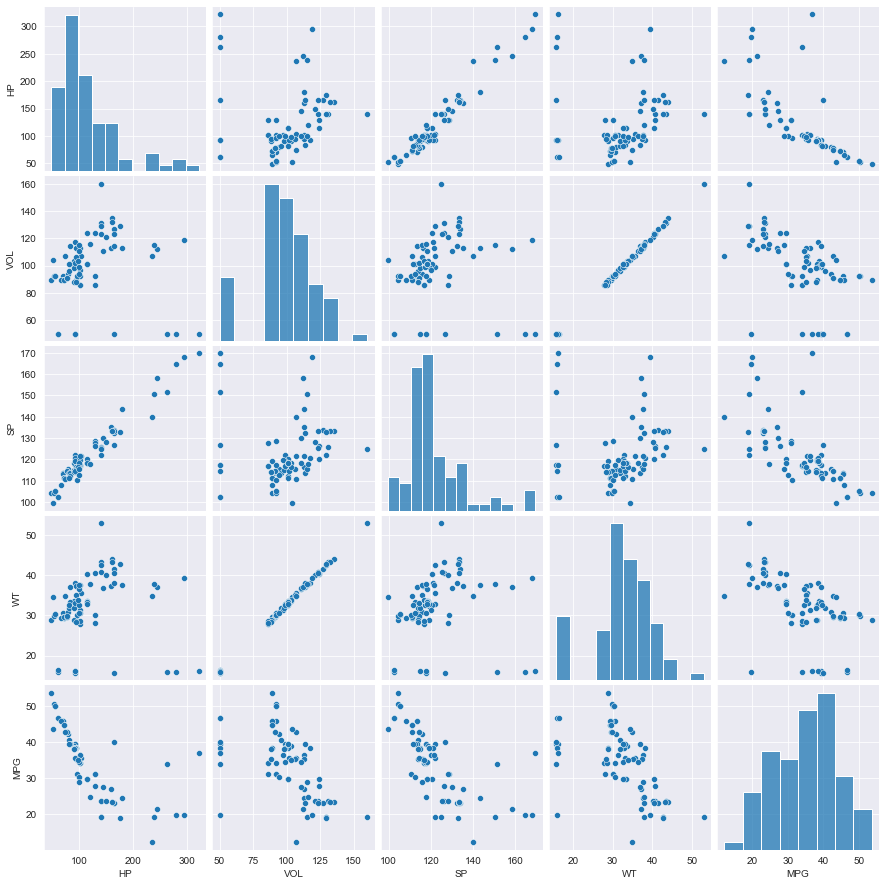

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [32]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:38:01   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Find the performance matrics
# Create a data frame with actual y ans predicted y columns

df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [35]:
cars.iloc[:,0:4]

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [36]:
# predict for the given x data columns

pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'daily' is not defined
    sunday~daily
           ^^^^^

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE :", mean_squared_error(df1["actual_y1"], df1["pred_y1"]))